In [2]:
from tensorflow import keras
model = keras.models.load_model("keras_p16_cnn_catdog_augemented_model.keras")
model.summary()

Model: "my_augmented_catdog_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 90, 90, 3)]       0         
                                                                 
 sequential_8 (Sequential)   (None, 90, 90, 3)         0         
                                                                 
 my_scaling (Rescaling)      (None, 90, 90, 3)         0         
                                                                 
 my_conv2d_1 (Conv2D)        (None, 88, 88, 32)        896       
                                                                 
 my_pooling_1 (MaxPooling2D)  (None, 44, 44, 32)       0         
                                                                 
 my_conv2d_2 (Conv2D)        (None, 42, 42, 64)        18496     
                                                                 
 my_pooling_2 (MaxPooling2D)  (None, 21, 

(1, 90, 90, 3)


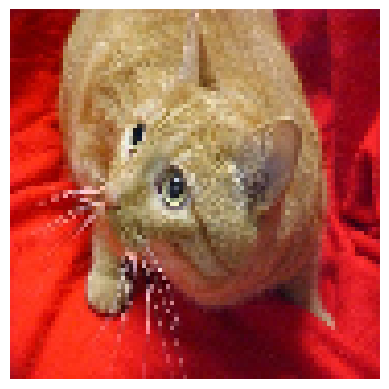

In [15]:
import numpy as np
import matplotlib.pyplot as plt
img_path = "/N/project/hurricane-deep-learning/data/dl-practice/PetImages/Cat/18.jpg"
img = keras.utils.load_img(img_path,target_size=(90,90))
array = keras.utils.img_to_array(img)                    # extract an array (90,90,3)
img_tensor = np.expand_dims(array,axis=0)                # turn it into a batch of size (0,90,90,3)
print(img_tensor.shape)
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
#plt.matshow(img_tensor[0].astype("uint8"))              # plotting a nuompy array but must have astype
#plt.contourf(img_tensor[0,:,:,2])                       # this will plot a contourf array with upside down image 
plt.show()

In [17]:
from tensorflow.keras import layers
#print(model.layers)
layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer,(layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs) # a lot of output here
activations = activation_model.predict(img_tensor)
for i in range(len(layer_names)):
    print(layer_outputs[i],"-----",layer_names[i]) 

1/1 [==============================] - 0s 51ms/step
KerasTensor(type_spec=TensorSpec(shape=(None, 88, 88, 32), dtype=tf.float32, name=None), name='my_conv2d_1/Relu:0', description="created by layer 'my_conv2d_1'") ----- my_conv2d_1
KerasTensor(type_spec=TensorSpec(shape=(None, 44, 44, 32), dtype=tf.float32, name=None), name='my_pooling_1/MaxPool:0', description="created by layer 'my_pooling_1'") ----- my_pooling_1
KerasTensor(type_spec=TensorSpec(shape=(None, 42, 42, 64), dtype=tf.float32, name=None), name='my_conv2d_2/Relu:0', description="created by layer 'my_conv2d_2'") ----- my_conv2d_2
KerasTensor(type_spec=TensorSpec(shape=(None, 21, 21, 64), dtype=tf.float32, name=None), name='my_pooling_2/MaxPool:0', description="created by layer 'my_pooling_2'") ----- my_pooling_2
KerasTensor(type_spec=TensorSpec(shape=(None, 19, 19, 128), dtype=tf.float32, name=None), name='my_conv2d_3/Relu:0', description="created by layer 'my_conv2d_3'") ----- my_conv2d_3
KerasTensor(type_spec=TensorSpec(sh

(1, 88, 88, 32)


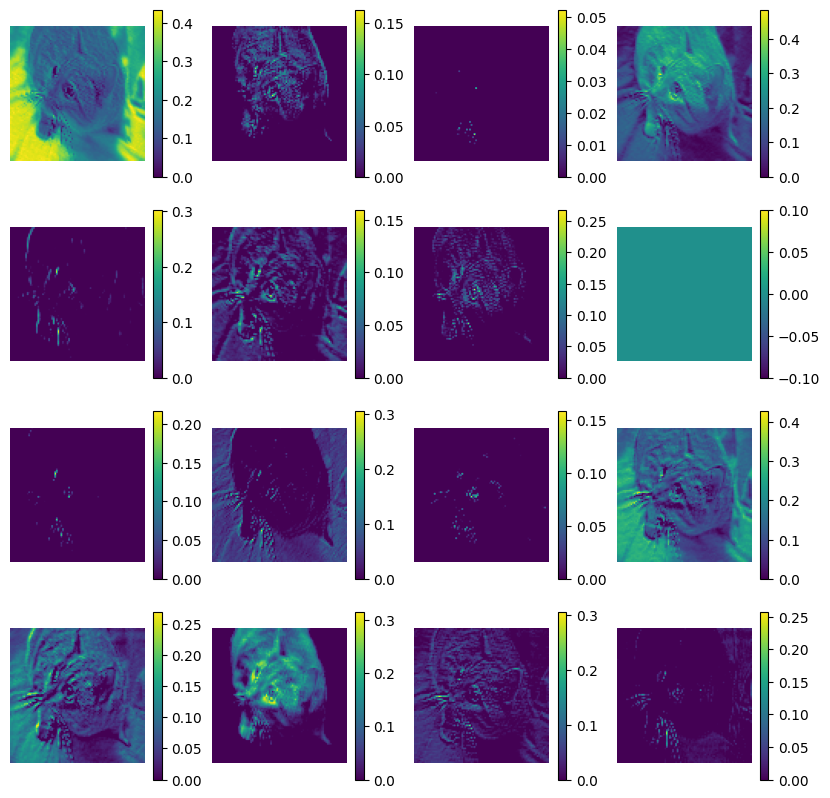

In [4]:
#
# display the first activation layer only
#
first_layer = activations[0]
print(first_layer.shape)
#plt.matshow(first_layer[0,:,:,0],cmap="viridis")
#plt.figure()
#plt.matshow(first_layer[0,:,:,5],cmap="viridis")
plt.figure(figsize=(10,10))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(first_layer[0,:,:,i],cmap="viridis")
    plt.colorbar()
    plt.axis("off")
    

my_conv2d_1 (1, 88, 88, 32) 32 88 2 (196, 1568)
my_pooling_1 (1, 44, 44, 32) 32 44 2 (108, 864)
my_conv2d_2 (1, 42, 42, 64) 64 42 4 (208, 832)
my_pooling_2 (1, 21, 21, 64) 64 21 4 (124, 496)
my_conv2d_3 (1, 19, 19, 128) 128 19 8 (232, 464)
my_pooling_3 (1, 9, 9, 128) 128 9 8 (152, 304)
my_conv2d_4 (1, 7, 7, 256) 256 7 16 (272, 272)
my_pooling_4 (1, 3, 3, 256) 256 3 16 (208, 208)
my_conv2d_5 (1, 1, 1, 256) 256 1 16 (176, 176)


/tmp/ipykernel_30287/3719377398.py:18: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


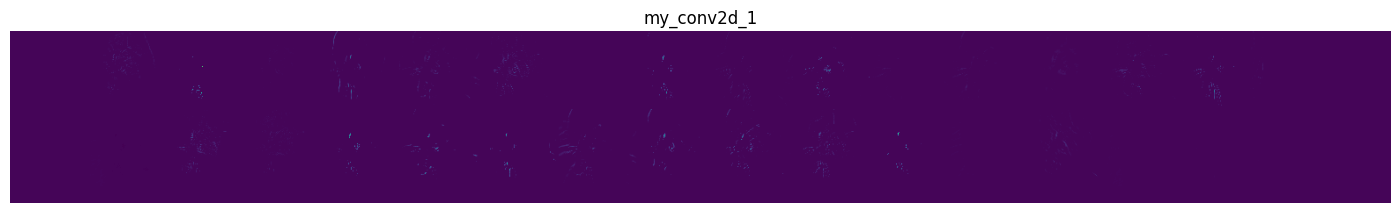

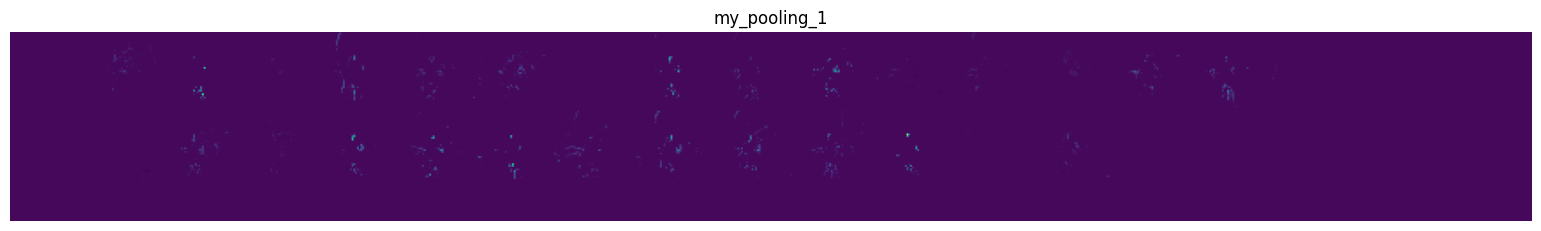

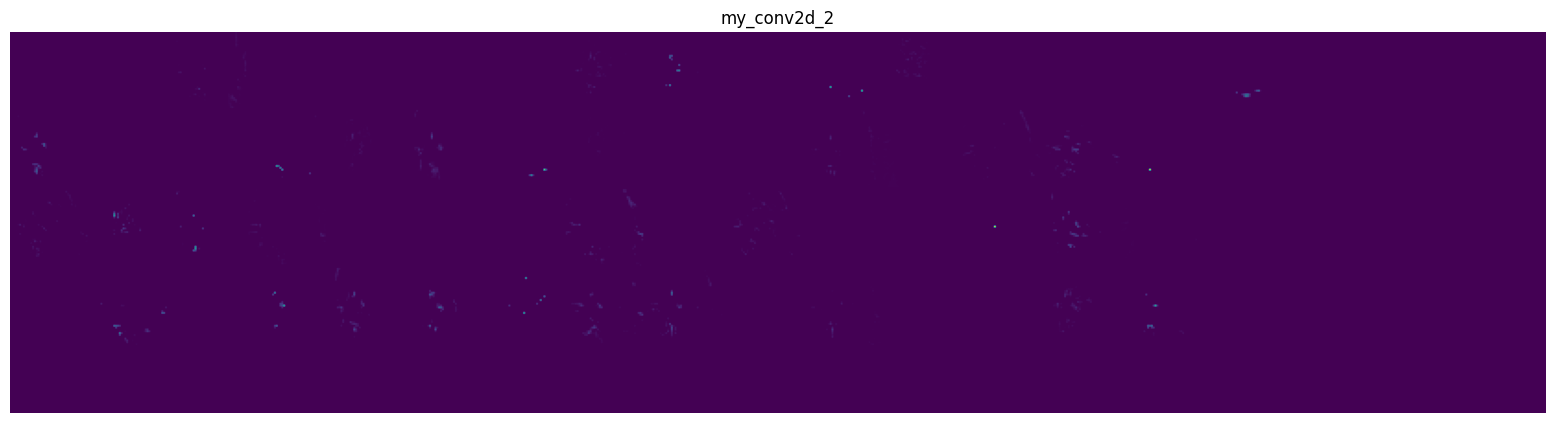

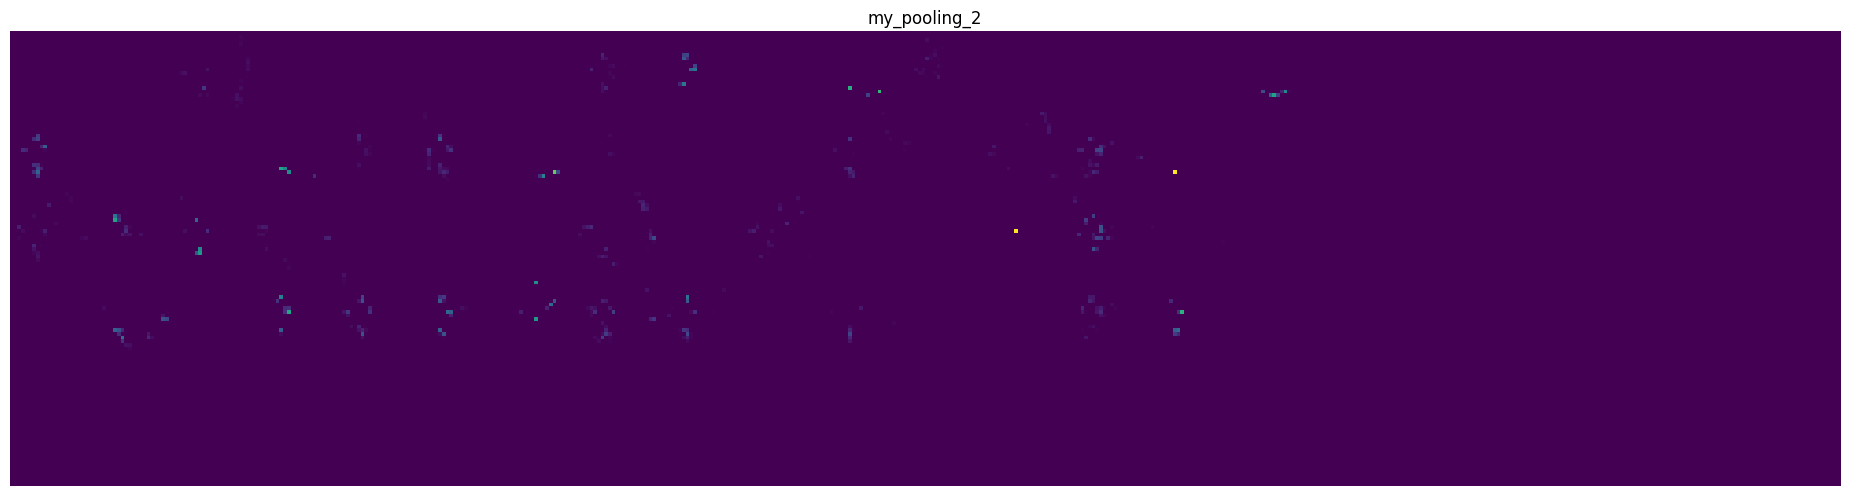

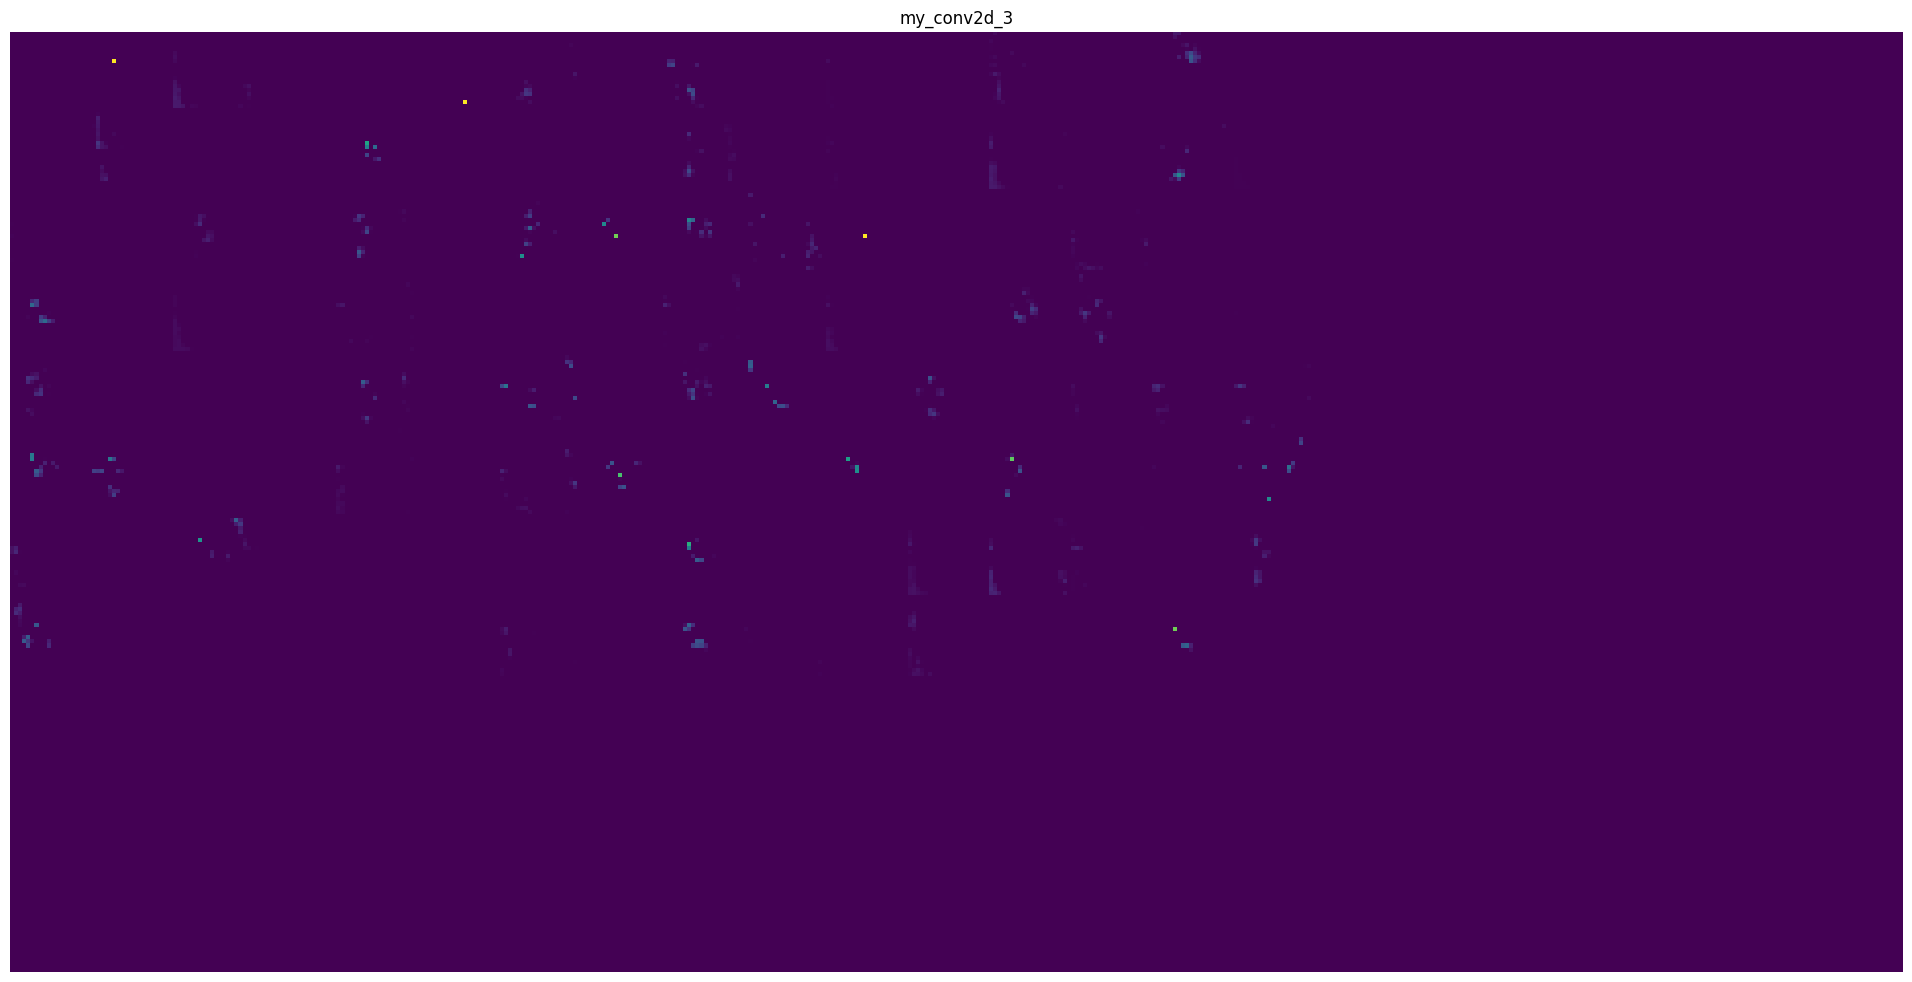

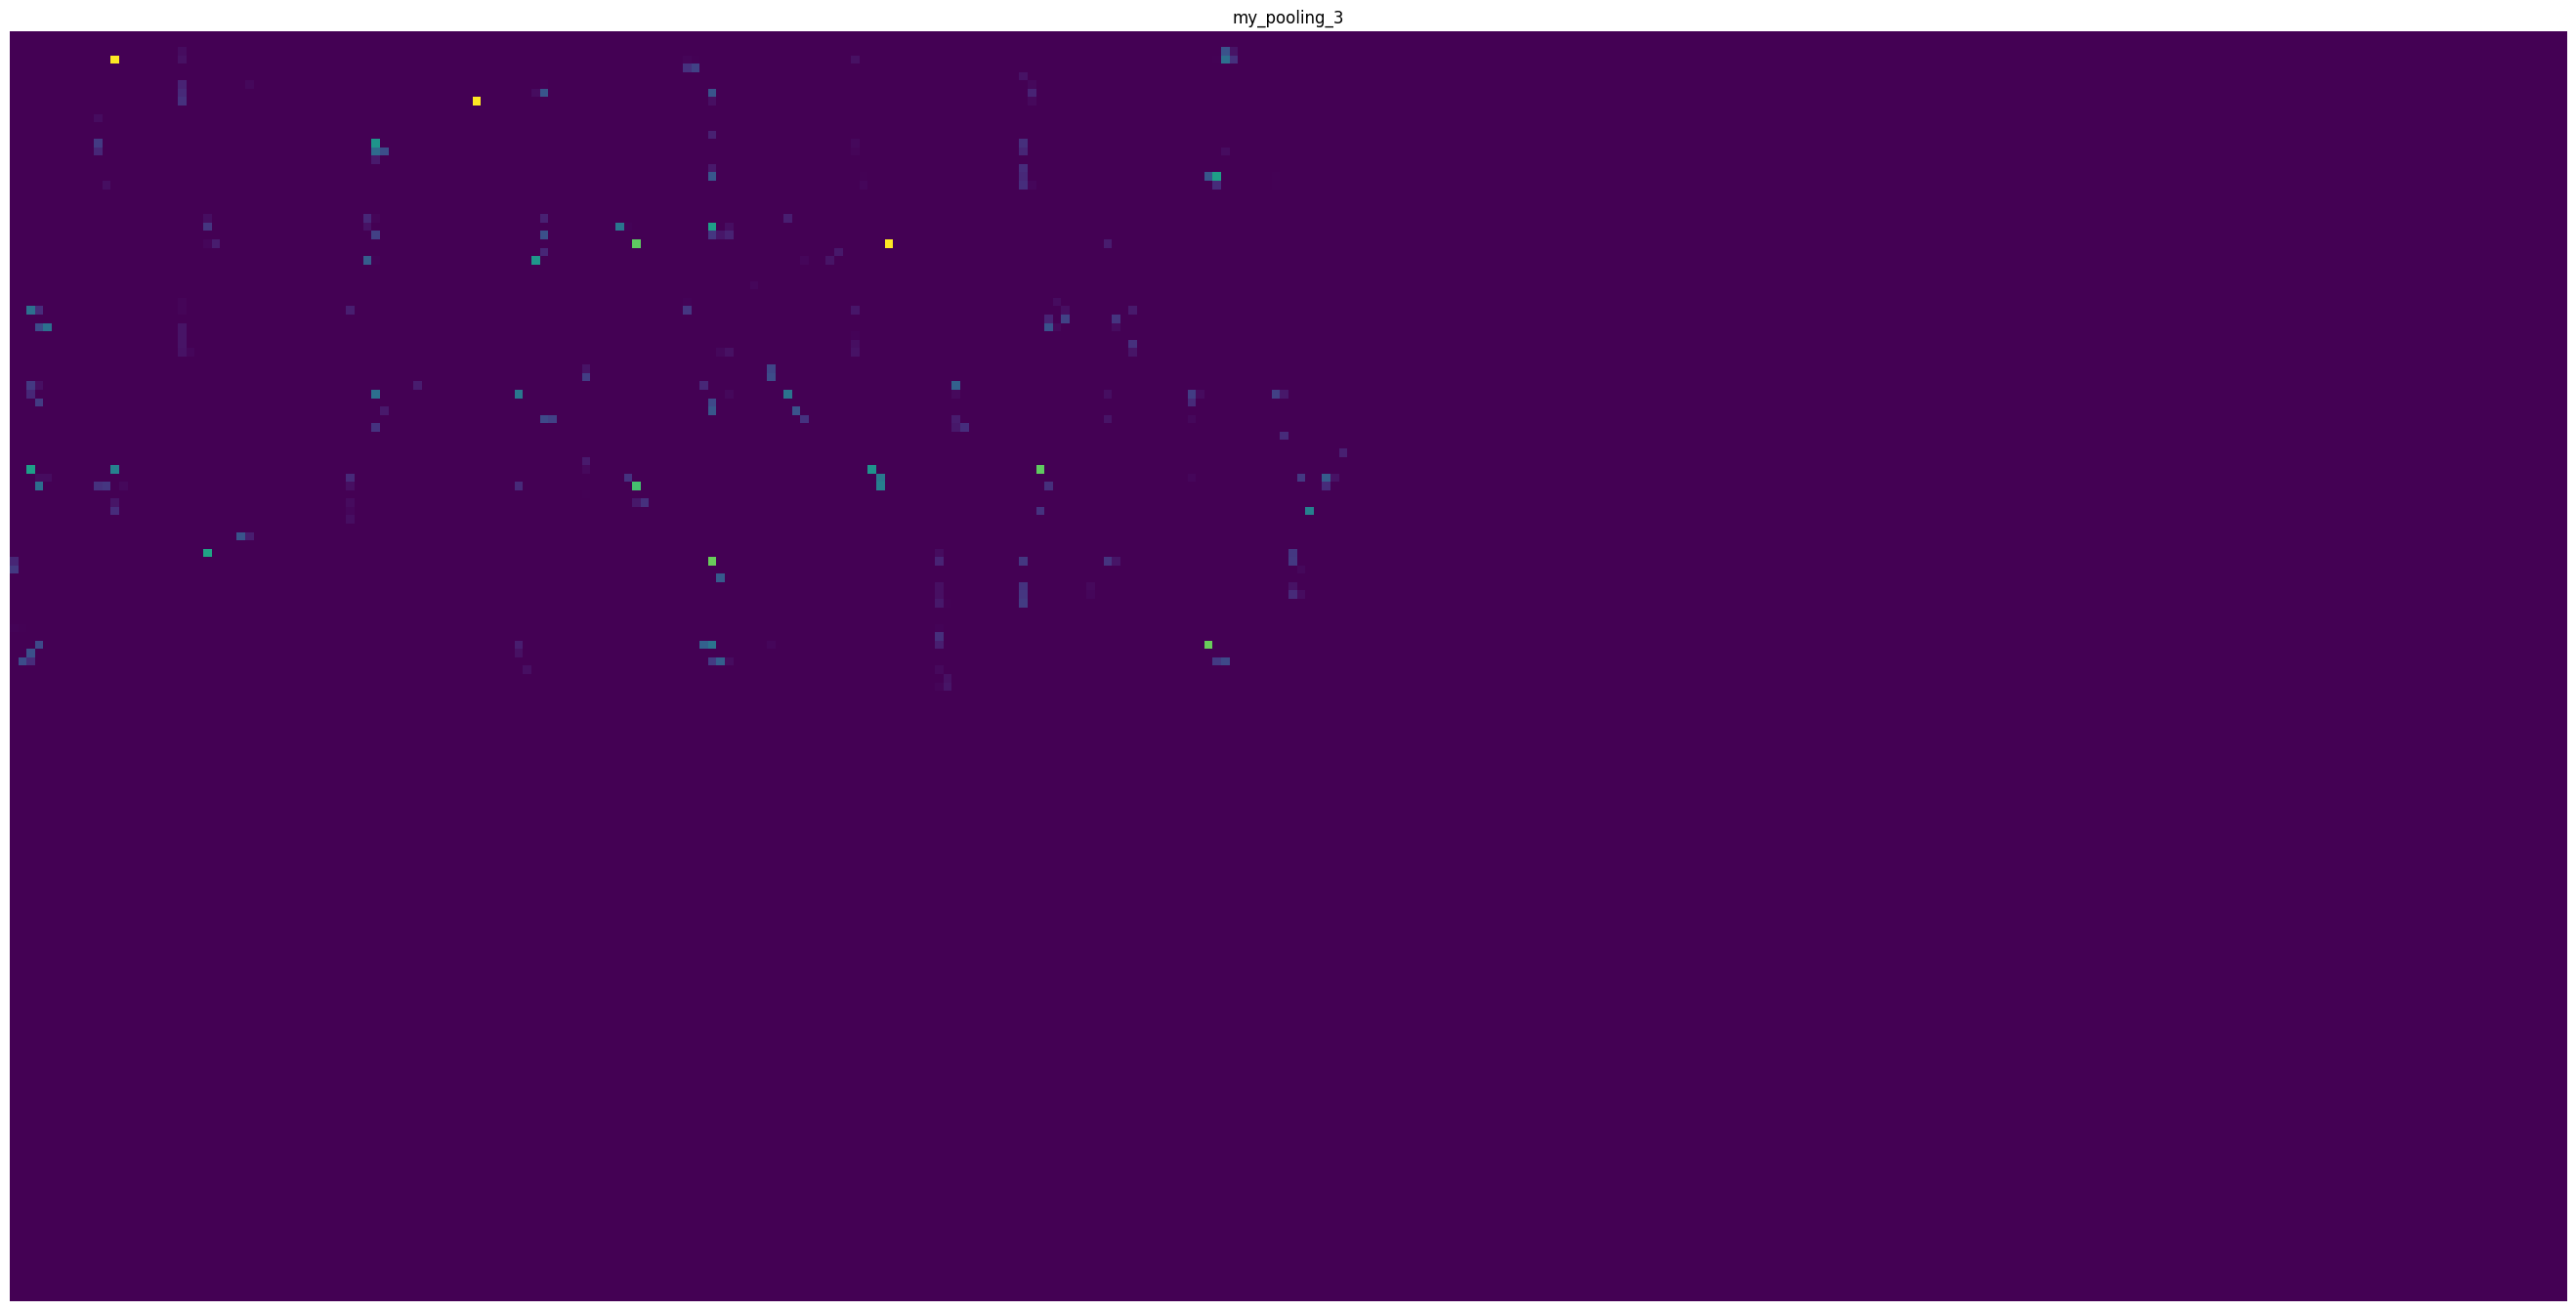

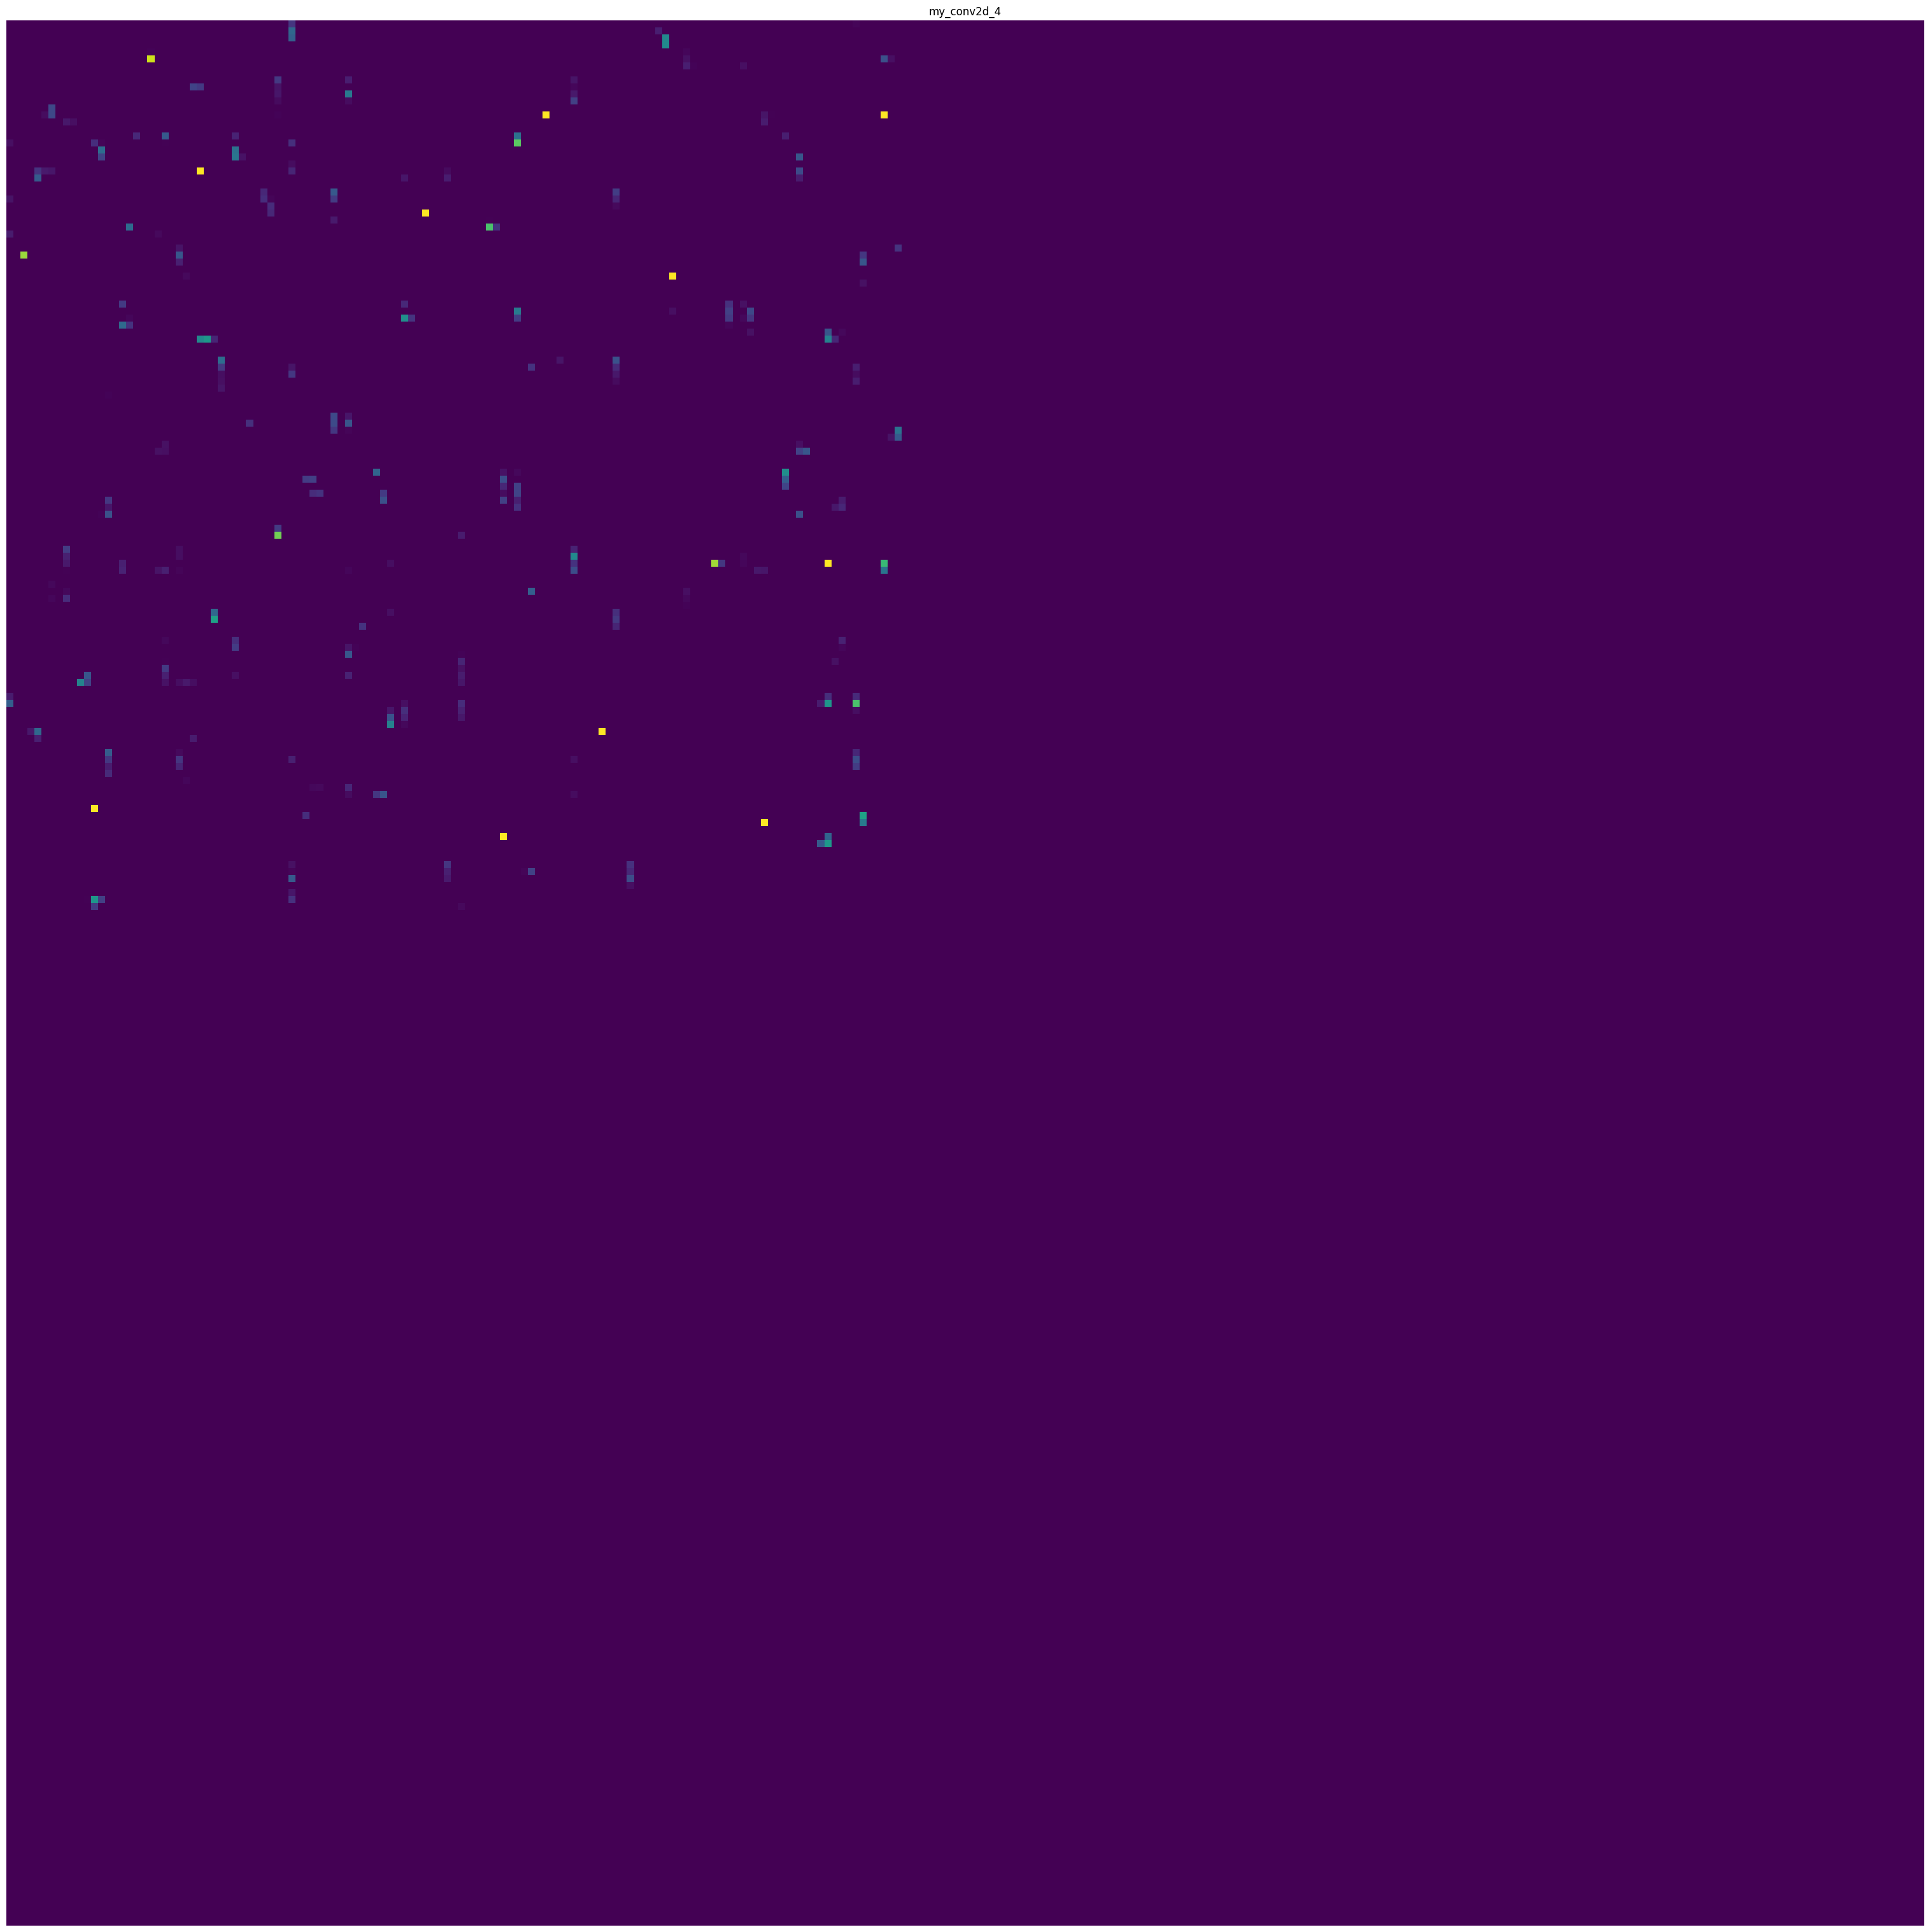

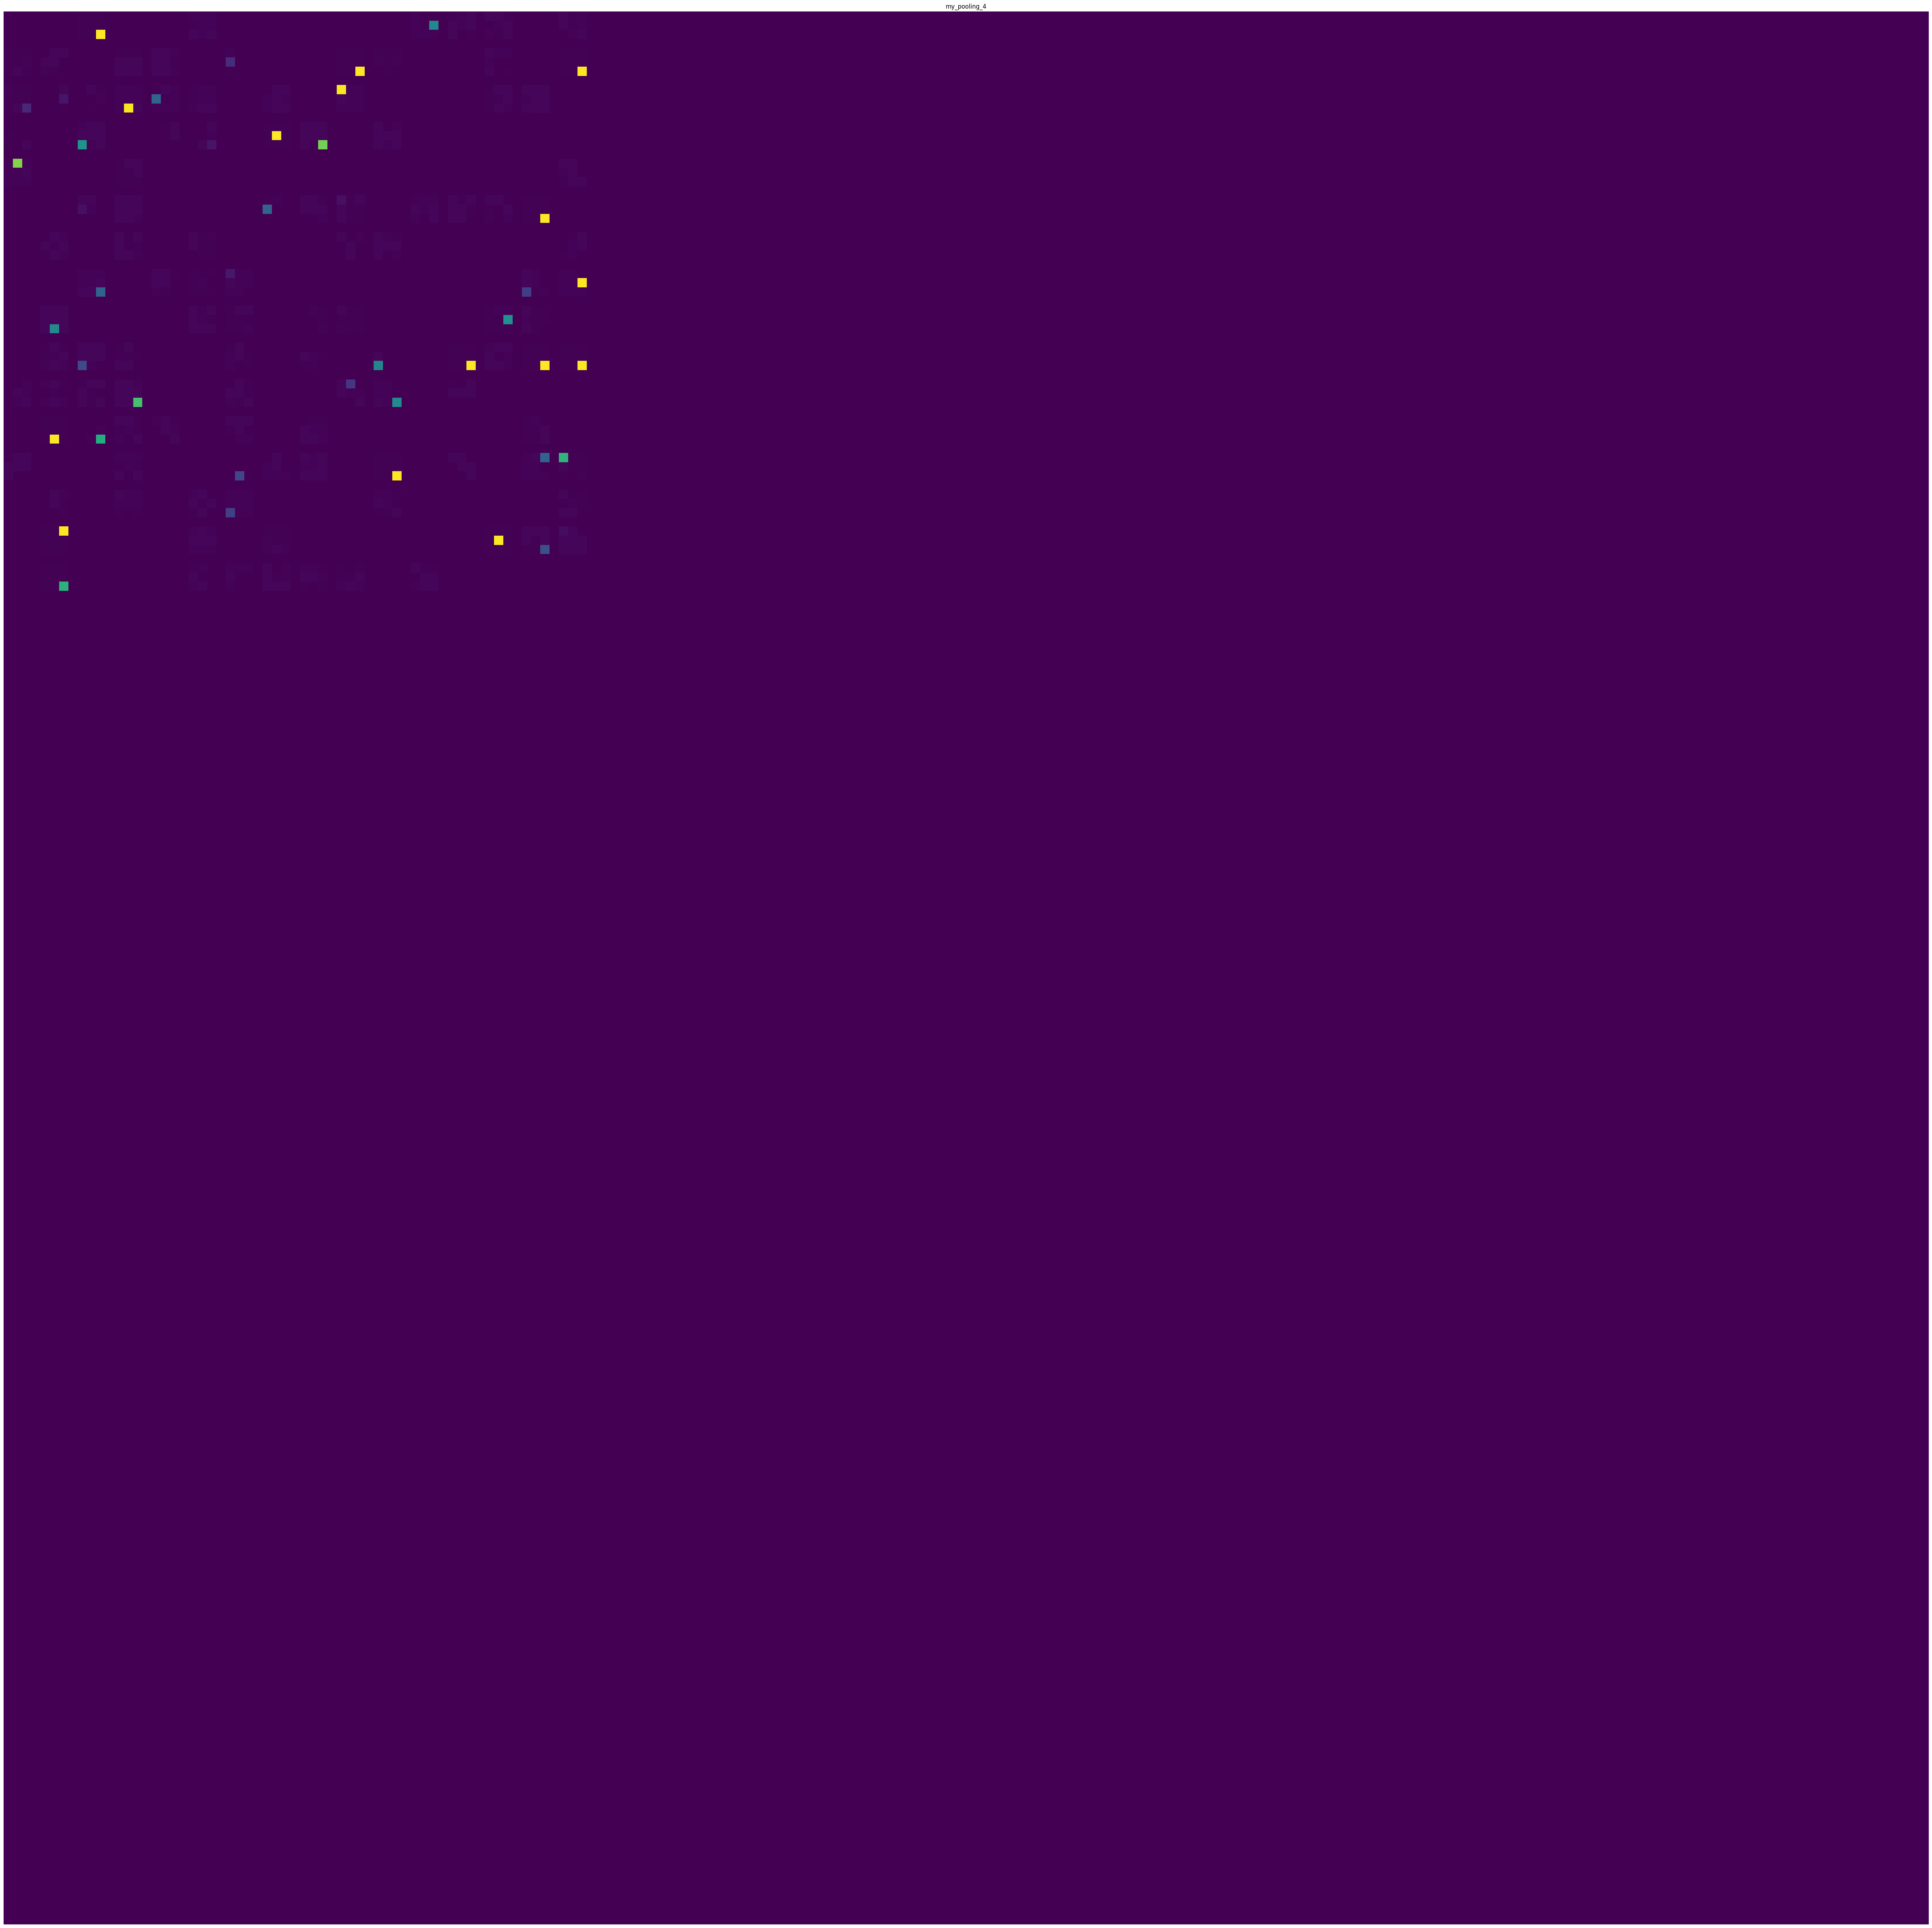

In [19]:
#
# more fancy display of all activation layers and channels
#
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size+1)*n_cols, images_per_row*(size+1)))
    print(layer_name,layer_activation.shape,n_features,size,n_cols,display_grid.shape)
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col*images_per_row + row
            channel_image = layer_activation[0,:,:,channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image -= np.clip(channel_image,0 ,255).astype("uint8")
            display_grid[col*(size+1):(col+1)*size+col,row*(size+1):(row+1)*size+row] = channel_image
     
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")